In [1]:
import sys
sys.path.append('../../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
from sample_data import sample_data
from fscoreai import linear
from fscoreai import loss

# Univariate Linear Data

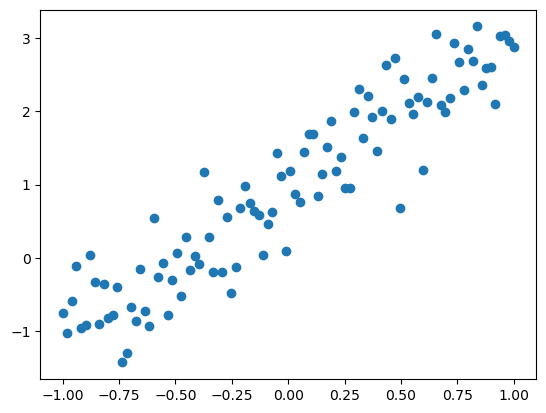

In [4]:
X, y = sample_data.simulate_linear_data()
plt.scatter(X, y)

## Sklearn Model

In [5]:
model_skl = linear_model.LinearRegression()
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[0.94807674] [[2.03448317]]


## Custom Class

In [6]:
# Closed Form 
model = linear.LinearRegression()
model.fit_closed_form(X, y)
print(model.intercept_, model.coef_)

[0.94807674] [[2.03448317]]


In [7]:
# Gradient Descent
model = linear.LinearRegression()
model.fit(X, y, lr=1e-2, n_epochs=1000)
print(model.intercept_, model.coef_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 32692.40it/s]

[0.94798142] [[1.96659174]]


## Plotting

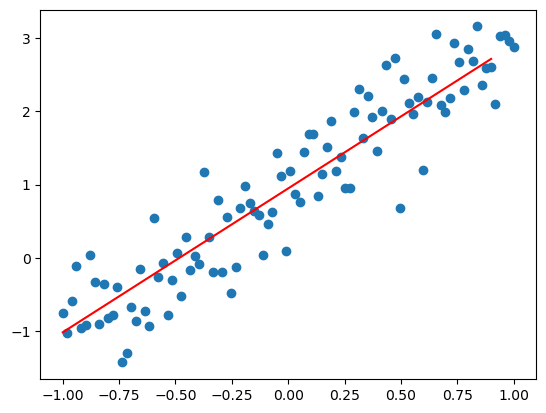

In [8]:
X_test = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_pred = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")

# Multivariate Linear Data

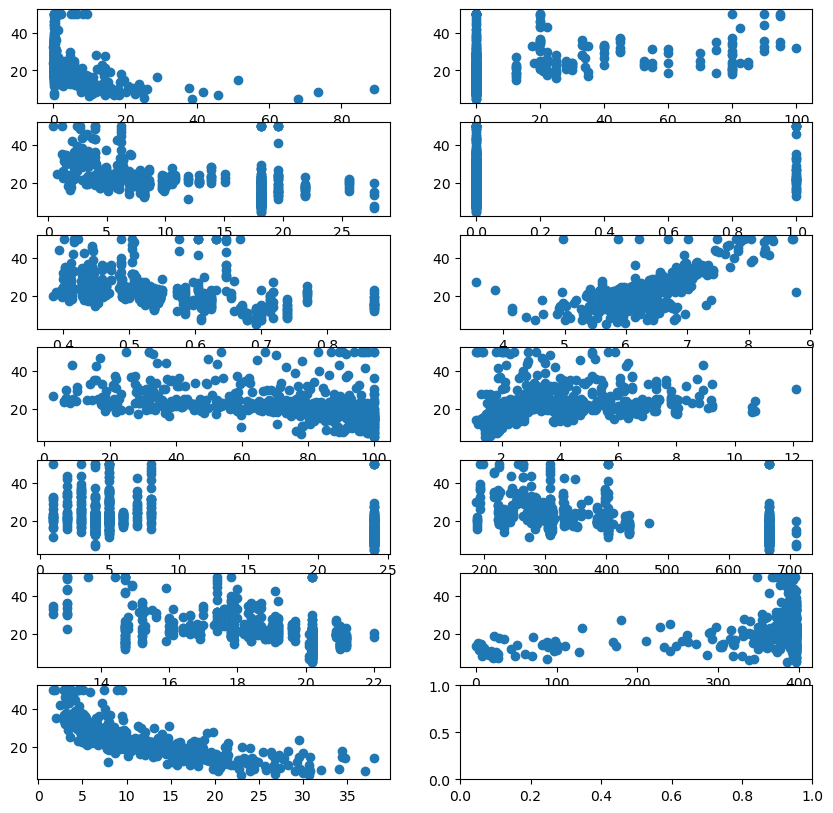

In [35]:
X, y = sample_data.boston_house_data()
fig, ax = plt.subplots(7,2, figsize=(10,10))
ax[0][0].scatter(X[:, 0], y) #crime
ax[0][1].scatter(X[:, 1], y) #zoning
ax[1][0].scatter(X[:, 2], y) #industry
ax[1][1].scatter(X[:, 3], y) #charles river
ax[2][0].scatter(X[:, 4], y) #nox
ax[2][1].scatter(X[:, 5], y) #number pf rooms
ax[3][0].scatter(X[:, 6], y) #age
ax[3][1].scatter(X[:, 7], y) #dis
ax[4][0].scatter(X[:, 8], y) #rad
ax[4][1].scatter(X[:, 9], y) #tax
ax[5][0].scatter(X[:, 10], y) #ptratio
ax[5][1].scatter(X[:, 11], y) #black
ax[6][0].scatter(X[:, 12], y) #black

In [36]:
X = X[:, [0, 5]]

## Sklearn Model

In [37]:
model_skl = linear_model.LinearRegression()
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[-29.24471945] [[-0.26491325  8.39106825]]


## Custom Class

In [47]:
# Closed Form 
model = linear.LinearRegression()
model.fit_closed_form(X, y)
print(model.intercept_, model.coef_)

[-29.24471945] [[-0.26491325]
 [ 8.39106825]]


In [39]:
# Gradient Descent
model = linear.LinearRegression()
model.fit(X, y, lr=1e-2, n_epochs=100)
print(model.intercept_, model.coef_)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 48271.42it/s]

[1.6902904] [[-0.36799869]
 [ 3.58317535]]


## Plotting

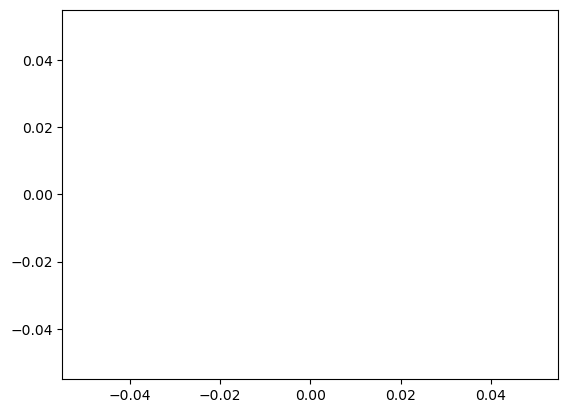

In [48]:
plt.plot(model.costs)

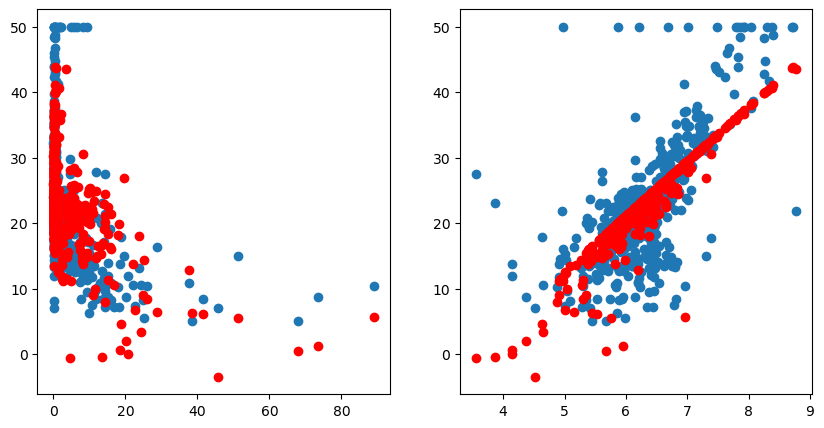

In [49]:
y_pred = model.predict(X)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X[:, 0], y)
ax[0].scatter(X[:, 0], y_pred, c="red")
ax[1].scatter(X[:, 1], y)
ax[1].scatter(X[:, 1], y_pred, c="red")

# Lasso Regression

## SkLearn

In [18]:
model_skl = linear_model.Lasso(alpha=0.5)
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[-22.62153896] [-0.27689311  7.34408753]


## Custom

In [19]:
model = linear.LassoRegression(alpha=0)
model.fit(X, y, lr=1e-2, n_epochs=10000, verbose=True)
print(model.intercept_, model.coef_)

 42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                   | 4240/10000 [00:00<00:00, 42395.39it/s]

0/10000 | Cost: 1027.4629272657705
100/10000 | Cost: 48.81807797198449
200/10000 | Cost: 48.59310247436817
300/10000 | Cost: 48.37311334200956
400/10000 | Cost: 48.1580000569245
500/10000 | Cost: 47.9476545506535
600/10000 | Cost: 47.74197114997044
700/10000 | Cost: 47.540846523794464
800/10000 | Cost: 47.34417963127864
900/10000 | Cost: 47.15187167104911
1000/10000 | Cost: 46.96382603156929
1100/10000 | Cost: 46.77994824260432
1200/10000 | Cost: 46.600145927761076
1300/10000 | Cost: 46.424328758080264
1400/10000 | Cost: 46.25240840665696
1500/10000 | Cost: 46.08429850426707
1600/10000 | Cost: 45.91991459597712
1700/10000 | Cost: 45.75917409871597
1800/10000 | Cost: 45.601996259786695
1900/10000 | Cost: 45.44830211629813
2000/10000 | Cost: 45.298014455495576
2100/10000 | Cost: 45.151057775970656
2200/10000 | Cost: 45.007358249731034
2300/10000 | Cost: 44.866843685110716
2400/10000 | Cost: 44.72944349050244
2500/10000 | Cost: 44.595088638894005
2600/10000 | Cost: 44.46371163319039
2700/

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 40433.30it/s]

8300/10000 | Cost: 40.28307298191502
8400/10000 | Cost: 40.24726765086252
8500/10000 | Cost: 40.21225591049298
8600/10000 | Cost: 40.17802017163312
8700/10000 | Cost: 40.144543234956735
8800/10000 | Cost: 40.11180828234416
8900/10000 | Cost: 40.07979886843313
9000/10000 | Cost: 40.048498912357
9100/10000 | Cost: 40.01789268966607
9200/10000 | Cost: 39.987964824427884
9300/10000 | Cost: 39.958700281502765
9400/10000 | Cost: 39.930084358990406
9500/10000 | Cost: 39.902102680843974
9600/10000 | Cost: 39.874741189647835
9700/10000 | Cost: 39.84798613955551
9800/10000 | Cost: 39.82182408938388
9900/10000 | Cost: 39.796241895860774
[-19.43855849] [[-0.29759055]
 [ 6.86700306]]


# Ridge Regression

## SkLearn

In [20]:
model_skl = linear_model.Ridge(alpha=1)
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[-29.02131597] [[-0.26553635  8.35587895]]


## Custom

In [21]:
model = linear.RidgeRegression(alpha=0.1)
model.fit(X, y, lr=1e-2, n_epochs=1000, verbose=True)
print(model.intercept_, model.coef_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 36999.86it/s]

0/1000 | Cost: 956.8966013146953
100/1000 | Cost: 49.49471995299233
200/1000 | Cost: 49.50249428713399
300/1000 | Cost: 49.50890231713136
400/1000 | Cost: 49.514164673090896
500/1000 | Cost: 49.518473646267346
600/1000 | Cost: 49.52199386298705
700/1000 | Cost: 49.52486446004644
800/1000 | Cost: 49.52720191340504
900/1000 | Cost: 49.52910302744075
[-1.02400495] [[-0.35271195]
 [ 3.98301612]]


# ElasticNet Regression

## SkLearn

In [22]:
model_skl = linear_model.ElasticNet(alpha=0.25, l1_ratio=0.5)
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[-16.73605257] [-0.29802675  6.41975063]


## Custom

In [23]:
model = linear.ElasticNetRegression(alpha=0.25, alpha_ratio=0.5)
model.fit(X, y, lr=1e-2, n_epochs=1000, verbose=True)
print(model.intercept_, model.coef_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 30110.73it/s]

0/1000 | Cost: 1228.6285956677027
100/1000 | Cost: 50.265592887725624
200/1000 | Cost: 49.976175808573714
300/1000 | Cost: 49.900639069514234
400/1000 | Cost: 49.85958101872338
500/1000 | Cost: 49.824870983389125
600/1000 | Cost: 49.79543371936495
700/1000 | Cost: 49.77039454944387
800/1000 | Cost: 49.74903864169743
900/1000 | Cost: 49.73077909506679
[-0.55423341] [[-0.35422058]
 [ 3.91438442]]


# Visualizing Slope vs. Cost for Univariate Data

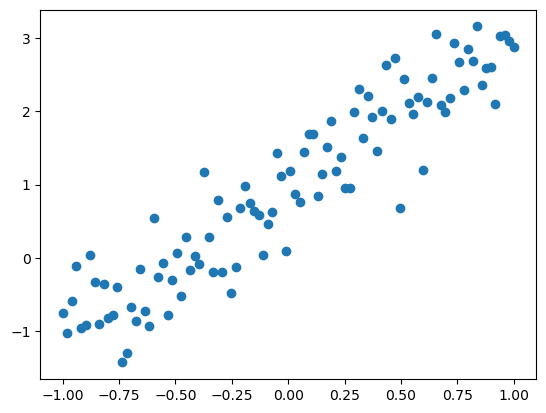

In [24]:
X, y = sample_data.simulate_linear_data()
plt.scatter(X, y)

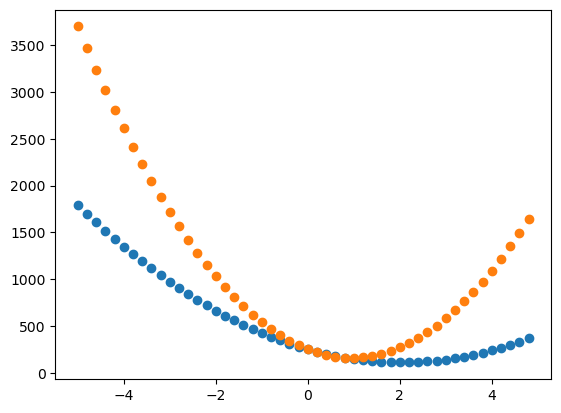

In [25]:
errors = []

def ssr(y, y_pred):
    return np.sum(np.square(y_pred - y))

coefs = np.arange(-5, 5, 0.2)
intercept = 0

for coef in coefs:
    y_pred = np.dot(X, coef) + intercept
    error = ssr(y, y_pred)
    errors.append(error)

plt.scatter(coefs, errors)
errors = []
coef = 0
intercepts = np.arange(-5, 5, 0.2)
for intercept in intercepts:
    y_pred = np.dot(X, coef) + intercept
    error = ssr(y, y_pred)
    errors.append(error)
    
plt.scatter(intercepts, errors)

# Hyperparameter Search

In [72]:
np.random.Generator.random(10)

array([0.77221674, 0.8474658 , 0.89051076, 0.16629764, 0.02528022,
       0.52939088, 0.40099865, 0.79497667, 0.13080165, 0.03043197])

In [ ]:
def RandomSearchCV(X, y, model, param_range, folds):
    param = random.sample(range(param_range[0], param_range[1]), 10)
    train_scores = dict()
    test_scores = dict()

In [66]:
X, y = sample_data.simulate_linear_data()
model = linear.LinearRegression()
params = {
    'lr': [1e-1, 1e-2, 1e-3, 1e-5, 1e-8, 1e-10],
    'n_epochs': [2,10,100,1000,10000,100000]
}

clf = GridSearchCV(model, params)
clf.fit(X, y)

TypeError: Cannot clone object '<fscoreai.linear.LinearRegression object at 0x7f5d347da750>' (type <class 'fscoreai.linear.LinearRegression'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

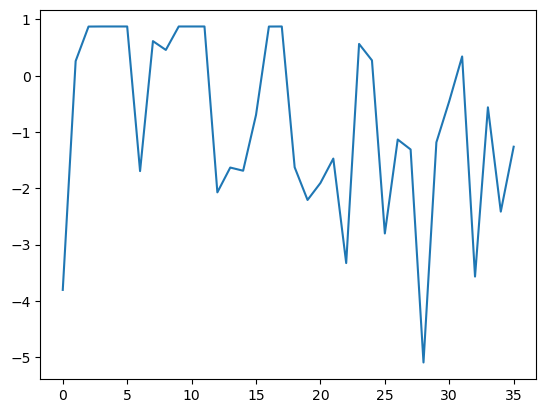

In [63]:
plt.plot(score)